#  Numpy

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

* ndarray: an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities.
* Mathematical functions for fast operations on entire arrays of data without having to write loops.
* Tools for reading/writing array data to disk and working with memory-mapped files.
* Linear algebra, random number generation, and Fourier transform capabilities.
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

* Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations
* Common array algorithms like sorting, unique, and set operations
* Efficient descriptive statistics and aggregating/summarizing data
* Data alignment and relational data manipulations for merging and joining together heterogeneous datasets
* Expressing conditional logic as array expressions instead of loops with if-elifelse branches
* Expressing conditional logic as array expressions instead of loops with if-elifelse branches
* Group-wise data manipulations (aggregation, transformation, function application)

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data.

In [17]:
my_arr = np.arange(1000000)

In [18]:
my_list = list(range(1000000))

In [19]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 21.9 ms


In [20]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 886 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory!!

## The NumPy ndarray: A Multidimensional Array Object

N-dimensional array object, or _ndarray_, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

In [21]:
data = np.random.randn(2, 3)

In [22]:
data

array([[-1.97228377,  1.6651078 ,  0.02915452],
       [-0.03841129, -0.11321446,  1.21916456]])

In [23]:
data * 10

array([[-19.72283772,  16.65107803,   0.29154518],
       [ -0.38411287,  -1.13214461,  12.19164558]])

In [24]:
data + data

array([[-3.94456754,  3.33021561,  0.05830904],
       [-0.07682257, -0.22642892,  2.43832912]])

An ndarray is a generic multidimensional container for **homogeneous** data.

Every array has a **shape**, a tuple indicating the size of each dimension, and a **dtype**, an object describing the data type of the array:

In [25]:
data.shape

(2, 3)

In [26]:
data.dtype

dtype('float64')

### Creating ndarrays

The easiest way to create an array is to use the **array** function (accepts any sequence-like object):

In [27]:
data1 = [6, 7.5, 8, 0, 1]

In [28]:
arr1 = np.array(data1)

In [29]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [30]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [31]:
arr2 = np.array(data2)

In [32]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [33]:
arr2.ndim

2

In [34]:
arr2.shape

(2, 4)

Unless explicitly specified, np.array tries to infer a good data type for the array that it creates:

In [35]:
arr1.dtype

dtype('float64')

In [36]:
arr2.dtype

dtype('int32')

**zeros** and **ones** create arrays of 0s or 1s, respectively, with a given length or shape. **empty** creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape:

In [37]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [39]:
np.empty((2, 3, 2))

array([[[1.05427629e-311, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 1.03030561e-071]],

       [[6.87037948e+169, 1.34634247e+165],
        [2.78668945e+179, 2.46331486e+184],
        [2.56954244e+184, 8.00522865e+169]]])

**arange** is an array-valued version of the built-in Python range function:

In [40]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

![alt text](images/creating arrays.png "Array creation functions")

### Data Types for ndarrays

The data type or _dtype_ is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [41]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [42]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [43]:
arr1.dtype

dtype('float64')

In [44]:
arr2.dtype

dtype('int32')

The numerical dtypes are named the same way: a type name, like *float* or *int*, followed by a number indicating the number of bits per element. 

![alt text](images/datatypes.png "NumPy data types")

You can explicitly convert or cast an array from one dtype to another using ndarray’s **astype** method:

In [45]:
arr = np.array([1, 2, 3, 4, 5])

In [46]:
arr.dtype

dtype('int32')

In [47]:
float_arr = arr.astype(np.float64)

In [48]:
float_arr.dtype

dtype('float64')

In [49]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [50]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [51]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [52]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)

In [53]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

**It’s important to be cautious when using the numpy.string_ type, as string data in NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data.**

You can also use another array’s dtype attribute:

In [54]:
int_array = np.arange(10)

In [55]:
calibers = np.array([0.22, 0.270, 0.357, 0.380, 0.44, 0.50], dtype=np.float64)

In [56]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [57]:
empty_uint32 = np.empty(8, dtype="u4")

In [58]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

**Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.**

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data without writing any _for_ loops. NumPy users call this __vectorization__. Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [59]:
arr = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

In [60]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [61]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [62]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [63]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [64]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [65]:
arr2 = np.array([[0.0, 4.0, 1.0], [7.0, 2.0, 12.0]])

In [66]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [67]:
arr = np.arange(10)

In [68]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
arr[5]

5

In [70]:
arr[5:8]

array([5, 6, 7])

In [71]:
arr[5:8] = 12

In [72]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

An important first distinction from Python’s built-in lists is that array slices are _views_ on the original array.
This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [73]:
arr_slice = arr[5:8]

In [74]:
arr_slice

array([12, 12, 12])

In [75]:
arr_slice[1] = 12345

In [76]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:

In [77]:
arr_slice[:] = 64

In [78]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array:

In [79]:
arr_slice = arr[5:8].copy()

In [80]:
arr_slice

array([64, 64, 64])

In [81]:
arr_slice[1] = 12345

In [82]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [83]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [84]:
arr2d[2]

array([7, 8, 9])

You can pass a comma-separated list of indices to select individual elements:

In [85]:
arr2d[0][2]

3

In [86]:
arr2d[0, 2]

3

![alt text](images/indexing.png "Indexing elements in a NumPy array")

In multidimensional arrays, if you omit later indices, the returned object will be an lower dimensional ndarray consisting of _all the data along the higher dimensions_:

In [87]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [88]:
arr3d.shape

(2, 2, 3)

In [89]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 × 3 array:

In [90]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [91]:
old_values = arr3d[0].copy()

In [92]:
arr3d[0] = 42

In [93]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [94]:
arr3d[0] = old_values

In [95]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[1, 0] gives you all of the values whose indices start with (1, 0), forming a 1-dimensional array:

This expression is the same as though we had indexed in two steps:

In [96]:
x = arr3d[1]

In [97]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [98]:
x[0]

array([7, 8, 9])

#### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [99]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [100]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit different:

In [101]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [102]:
arr2d[2]

array([7, 8, 9])

In [103]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [104]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices:

In [105]:
arr2d[1, :2]

array([4, 5])

In [106]:
arr2d[:2, 2]

array([3, 6])

A colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing:

In [107]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Assigning to a slice expression assigns to the whole selection:

In [108]:
arr2d[:2, 1:] = 0

In [109]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

![alt text](images/slicing2d.png " Two-dimensional array slicing")

#### Boolean Indexing

In [110]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

In [111]:
data = np.random.randn(7, 4)

In [112]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [113]:
data

array([[ 0.42425972, -1.01810234, -1.47032688, -1.26093978],
       [-0.59509527,  0.15988096,  1.4219125 , -0.04540974],
       [ 0.06156687, -1.6646944 ,  0.19329934,  1.78775754],
       [-1.3199705 ,  0.31642707, -1.15229884, -1.9321231 ],
       [-2.02325846, -0.64300317,  1.44120491,  0.05457598],
       [-0.01422017,  0.01706387, -0.57377708,  1.02064396],
       [-0.07262931,  0.63130613,  0.09040335, -0.1076349 ]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'. Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. Thus, comparing names with the string 'Bob' yields a boolean array:

In [114]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [115]:
data[names == "Bob"]

array([[ 0.42425972, -1.01810234, -1.47032688, -1.26093978],
       [-1.3199705 ,  0.31642707, -1.15229884, -1.9321231 ]])

The boolean array must be of the same length as the array axis it’s indexing. 

In [116]:
data[names == "Bob", 2:]

array([[-1.47032688, -1.26093978],
       [-1.15229884, -1.9321231 ]])

In [117]:
data[names == "Bob", 3]

array([-1.26093978, -1.9321231 ])

To select everything but 'Bob', you can either use **!=** or negate the condition using **~**:

In [118]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [119]:
data[~(names == "Bob")]

array([[-0.59509527,  0.15988096,  1.4219125 , -0.04540974],
       [ 0.06156687, -1.6646944 ,  0.19329934,  1.78775754],
       [-2.02325846, -0.64300317,  1.44120491,  0.05457598],
       [-0.01422017,  0.01706387, -0.57377708,  1.02064396],
       [-0.07262931,  0.63130613,  0.09040335, -0.1076349 ]])

The **~** operator can be useful when you want to invert a general condition:

In [120]:
cond = names == "Bob"

In [121]:
data[~cond]

array([[-0.59509527,  0.15988096,  1.4219125 , -0.04540974],
       [ 0.06156687, -1.6646944 ,  0.19329934,  1.78775754],
       [-2.02325846, -0.64300317,  1.44120491,  0.05457598],
       [-0.01422017,  0.01706387, -0.57377708,  1.02064396],
       [-0.07262931,  0.63130613,  0.09040335, -0.1076349 ]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like & (and) and | (or):

In [122]:
mask = (names == "Bob") | (names == "Will")

In [123]:
mask

array([ True, False,  True,  True,  True, False, False])

In [124]:
data[mask]

array([[ 0.42425972, -1.01810234, -1.47032688, -1.26093978],
       [ 0.06156687, -1.6646944 ,  0.19329934,  1.78775754],
       [-1.3199705 ,  0.31642707, -1.15229884, -1.9321231 ],
       [-2.02325846, -0.64300317,  1.44120491,  0.05457598]])

**Selecting data from an array by boolean indexing always creates a _copy_ of the data, even if the returned array is unchanged.**

The Python keywords **and** and **or** do not work with boolean arrays. Use **&** (and) and **|** (or) instead.

Setting values with boolean arrays works in a common-sense way. To set all of the  negative values in data to 0 we need only do:

In [125]:
data

array([[ 0.42425972, -1.01810234, -1.47032688, -1.26093978],
       [-0.59509527,  0.15988096,  1.4219125 , -0.04540974],
       [ 0.06156687, -1.6646944 ,  0.19329934,  1.78775754],
       [-1.3199705 ,  0.31642707, -1.15229884, -1.9321231 ],
       [-2.02325846, -0.64300317,  1.44120491,  0.05457598],
       [-0.01422017,  0.01706387, -0.57377708,  1.02064396],
       [-0.07262931,  0.63130613,  0.09040335, -0.1076349 ]])

In [126]:
data[data < 0] = 0

In [127]:
data

array([[0.42425972, 0.        , 0.        , 0.        ],
       [0.        , 0.15988096, 1.4219125 , 0.        ],
       [0.06156687, 0.        , 0.19329934, 1.78775754],
       [0.        , 0.31642707, 0.        , 0.        ],
       [0.        , 0.        , 1.44120491, 0.05457598],
       [0.        , 0.01706387, 0.        , 1.02064396],
       [0.        , 0.63130613, 0.09040335, 0.        ]])

In [128]:
data < 0

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

Setting whole rows or columns using a one-dimensional boolean array is also easy:

In [129]:
data[names != "Joe"] = 7

In [130]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.15988096, 1.4219125 , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.01706387, 0.        , 1.02064396],
       [0.        , 0.63130613, 0.09040335, 0.        ]])

#### Fancy Indexing

In [265]:
arr = np.empty((8, 4))

In [266]:
for i in range(8):
    arr[i] = i

In [267]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [268]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Using negative indices selects rows from the end:

In [269]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one- dimensional array of elements corresponding to each tuple of indices:

In [270]:
arr = np.arange(32).reshape((8, 4))

In [271]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [272]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

The behavior of fancy indexing in this case is a bit different from what some users might have expected (myself included), which is the rectangular region formed by  selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [273]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [275]:
arr[[i for i in range(arr.shape[0]) if i % 2 == 0], 1:3]

array([[ 1,  2],
       [ 9, 10],
       [17, 18],
       [25, 26]])

**Keep in mind that fancy indexing, unlike slicing, always copies the data into a new  array.**

#### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data __without copying__ anything. Arrays have the transpose method and also the special T attribute:

In [276]:
arr = np.arange(15).reshape((3, 5))

In [277]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [278]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [279]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

For higher dimensional arrays, **transpose** will accept a tuple of axis numbers to permute the axes (for extra mind bending):

In [280]:
arr = np.arange(40).reshape((2, 5, 4))

In [281]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]]])

In [282]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [20, 21, 22, 23]],

       [[ 4,  5,  6,  7],
        [24, 25, 26, 27]],

       [[ 8,  9, 10, 11],
        [28, 29, 30, 31]],

       [[12, 13, 14, 15],
        [32, 33, 34, 35]],

       [[16, 17, 18, 19],
        [36, 37, 38, 39]]])

Here, the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged.

In [283]:
arr.transpose((1, 0, 2)).shape

(5, 2, 4)

Simple transposing with **.T** is a special case of swapping axes. ndarray has the method **swapaxes**, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [284]:
arr = np.arange(16).reshape((2, 2, 4))

In [285]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [286]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [288]:
arr.shape

(2, 2, 4)

**swapaxes similarly returns a view on the data without making a copy**

### Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.
Many ufuncs are simple element-wise transformations, like **sqrt** or **exp**:

In [289]:
arr = np.arange(10)

In [290]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

These are referred to as *unary ufuncs*. Others, such as **add** or **maximum*, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [291]:
x = np.random.randn(8)

In [292]:
y = np.random.randn(8)

In [293]:
x

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ])

In [294]:
y

array([ 1.56963721e-02, -2.24268495e+00,  1.15003572e+00,  9.91946022e-01,
        9.53324128e-01, -2.02125482e+00, -3.34077366e-01,  2.11836468e-03])

In [295]:
np.maximum(x, y)

array([ 0.47143516, -1.19097569,  1.43270697,  0.99194602,  0.95332413,
        0.88716294,  0.85958841,  0.00211836])

While not common, a *ufunc* can return multiple arrays. **modf** is one example, a vetorized version of the built-in Python **divmod**; it returns the fractional and integral  parts of a floating-point array:

In [296]:
arr = np.random.randn(7) * 5

In [297]:
arr

array([ 2.02726706,  1.4454597 ,  6.60579096, -7.73452777, -1.01323162,
       -3.27984672,  0.96710688])

In [298]:
remainder, whole_part = np.modf(arr)

In [299]:
remainder

array([ 0.02726706,  0.4454597 ,  0.60579096, -0.73452777, -0.01323162,
       -0.27984672,  0.96710688])

In [300]:
whole_part

array([ 2.,  1.,  6., -7., -1., -3.,  0.])

Ufuncs accept an optional **out** argument that allows them to operate in-place on arrays:

In [301]:
arr

array([ 2.02726706,  1.4454597 ,  6.60579096, -7.73452777, -1.01323162,
       -3.27984672,  0.96710688])

In [302]:
np.exp(arr)

array([7.59330591e+00, 4.24380259e+00, 7.39364446e+02, 4.37458915e-04,
       3.63043861e-01, 3.76340249e-02, 2.63032361e+00])

In [303]:
np.exp(arr, arr)

array([7.59330591e+00, 4.24380259e+00, 7.39364446e+02, 4.37458915e-04,
       3.63043861e-01, 3.76340249e-02, 2.63032361e+00])

In [304]:
arr

array([7.59330591e+00, 4.24380259e+00, 7.39364446e+02, 4.37458915e-04,
       3.63043861e-01, 3.76340249e-02, 2.63032361e+00])

![alt text](images/unary ufuncs.png "Unary ufuncs")

![alt text](images/binary ufuncs.png "Binary universal functions")

#### Array-Oriented Programming with Arrays

The practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents. 

Suppose we wished to evaluate the function $\sqrt{x^2 + y^2}$ across a regular grid of values. The np.meshgrid function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [315]:
points = np.arange(-5, 5, 0.01)  # 1000 equally spaced points

In [316]:
xs, ys = np.meshgrid(points, points)

In [317]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [318]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [319]:
xs.shape

(1000, 1000)

In [320]:
z = np.sqrt(xs**2 + ys**2)

In [321]:
z.min()

1.507288760336424e-13

In [322]:
z.max()

7.0710678118654755

In [323]:
import matplotlib.pyplot as plt

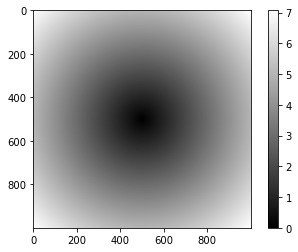

In [324]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

#### Expressing Conditional Logic as Array Operations

The **numpy.where** function is a vectorized version of the ternary expression *x if condition else y*. Suppose we had a boolean array and two arrays of values:

In [325]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from _xarr_ whenever the corresponding value in cond is True, and otherwise take the value from _yarr_. A list comprehension doing this might look like:

In [326]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [327]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With **np.where** you can write this very concisely:

In [331]:
xarr[np.where(xarr > 1.2)]

array([1.3, 1.4, 1.5])

In [332]:
result = np.where(cond, xarr, yarr)

In [333]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to *np.where* don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is very easy to do with *np.where*:

In [338]:
arr = np.random.randn(4, 4)

In [339]:
arr

array([[ 0.55343891,  1.31815155, -0.46930528,  0.67555409],
       [-1.81702723, -0.18310854,  1.05896919, -0.39784023],
       [ 0.33743765,  1.04757857,  1.04593826,  0.86371729],
       [-0.12209157,  0.12471295, -0.32279481,  0.84167471]])

In [340]:
arr > 0

array([[ True,  True, False,  True],
       [False, False,  True, False],
       [ True,  True,  True,  True],
       [False,  True, False,  True]])

In [341]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [-2, -2,  2, -2],
       [ 2,  2,  2,  2],
       [-2,  2, -2,  2]])

You can combine scalars and arrays when using np.where. For example, I can replace all positive values in arr with the constant 2 like so:

In [342]:
np.where(arr > 0, 2, arr)  # set only positive values to 2

array([[ 2.        ,  2.        , -0.46930528,  2.        ],
       [-1.81702723, -0.18310854,  2.        , -0.39784023],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.12209157,  2.        , -0.32279481,  2.        ]])

Intuitively, np.where is like asking "tell me where in this array, entries satisfy a given condition":

In [344]:
a = np.arange(5, 10)
np.where(a < 8)

(array([0, 1, 2], dtype=int64),)

In [345]:
a

array([5, 6, 7, 8, 9])

It can also be used to get entries in array that satisfy the condition:

In [346]:
a[np.where(a < 8)]

array([5, 6, 7])

In [347]:
arr

array([[ 0.55343891,  1.31815155, -0.46930528,  0.67555409],
       [-1.81702723, -0.18310854,  1.05896919, -0.39784023],
       [ 0.33743765,  1.04757857,  1.04593826,  0.86371729],
       [-0.12209157,  0.12471295, -0.32279481,  0.84167471]])

When a is a 2d array, np.where() returns an array of row idx's, and an array of col idx's:

In [348]:
np.where(arr > 0)

(array([0, 0, 0, 1, 2, 2, 2, 2, 3, 3], dtype=int64),
 array([0, 1, 3, 2, 0, 1, 2, 3, 1, 3], dtype=int64))

So that as in the 1d case, we can use np.where() to get entries in the 2d array that satisfy the condition

In [349]:
arr[np.where(arr > 0)]

array([0.55343891, 1.31815155, 0.67555409, 1.05896919, 0.33743765,
       1.04757857, 1.04593826, 0.86371729, 0.12471295, 0.84167471])

### Mathematical and Statistical Methods

You can use aggregations (often called reductions) like *sum, mean, and std (standard deviation)* either by calling the array instance method or using the top-level NumPy function.

In [350]:
arr = np.arange(20).reshape((5, 4))

In [351]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [352]:
arr.mean()

9.5

In [353]:
np.mean(arr)

9.5

In [354]:
arr.sum()

190

Functions like _mean_ and _sum_ take an optional **axis** argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

In [355]:
arr.mean(axis=1)

array([ 1.5,  5.5,  9.5, 13.5, 17.5])

In [356]:
arr.sum(axis=0)

array([40, 45, 50, 55])

Other methods like **cumsum** and **cumprod** do not aggregate, instead producing an array of the intermediate results:

In [357]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [358]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In multidimensional arrays, accumulation functions like _cumsum_ return an array of _the same size_, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [359]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [360]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [361]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [362]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [363]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

![alt text](images/basic statistical.png "Basic array statistical methods")

#### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
**sum** is often used as a means of _counting True values_ in a boolean array:

In [364]:
arr = np.random.randn(100)

In [365]:
arr

array([ 2.39096052,  0.07619959, -0.56644593,  0.03614194, -2.0749776 ,
        0.2477922 , -0.89715678, -0.13679483,  0.01828919,  0.75541398,
        0.21526858,  0.84100879, -1.44581008, -1.40197328, -0.1009182 ,
       -0.54824245, -0.14461951,  0.35402033, -0.03551303,  0.56573831,
        1.5456588 , -0.97423633, -0.07034488,  0.30796886, -0.20849876,
        1.03380073, -2.40045363,  2.03060362, -1.14263129,  0.21188339,
        0.70472062, -0.78543521,  0.46205974,  0.70422823,  0.52350797,
       -0.92625431,  2.00784295,  0.22696254, -1.15265911,  0.63197945,
        0.03951269,  0.46439233, -3.56351666,  1.32110562,  0.15263055,
        0.16452954, -0.43009569,  0.76736874,  0.98491984,  0.27083585,
        1.39198619,  0.07984231, -0.39996458, -1.02785056, -0.58471821,
        0.81659393, -0.08194705, -0.34476601,  0.52828815, -1.06898878,
       -0.51188131,  0.29120536,  0.5665337 ,  0.50359176,  0.28529568,
        0.48428811,  1.36348151, -0.78110528, -0.46801767,  1.22

In [366]:
(arr > 0).sum()  # Number of positive values

56

**any** tests whether one or more values in an array is True, while **all** checks if every value is True:

In [367]:
bools = np.array([False, False, True, False])

In [368]:
bools.any()

True

In [369]:
bools.all()

False

### Sorting

In [370]:
arr = np.random.randn(6)

In [371]:
arr

array([ 1.2103837 ,  0.79743542, -0.37981078,  0.70256222, -0.85034627,
        1.17681245])

In [372]:
arr.sort()  # inplace

In [373]:
arr

array([-0.85034627, -0.37981078,  0.70256222,  0.79743542,  1.17681245,
        1.2103837 ])

You can sort each one-dimensional section of values in a multidimensional array in- place along an axis by passing the axis number to sort:

In [374]:
arr = np.random.randn(5, 3)

In [375]:
arr

array([[-0.5243361 ,  0.70090773,  0.98418807],
       [-0.12172841,  2.36576863,  0.49614293],
       [ 0.79659487, -0.47402089, -0.05669572],
       [ 1.35779726, -0.80483372, -2.12362025],
       [-0.33350244, -0.88671935,  0.33419793]])

In [376]:
arr.sort(axis=1)

In [377]:
arr

array([[-0.5243361 ,  0.70090773,  0.98418807],
       [-0.12172841,  0.49614293,  2.36576863],
       [-0.47402089, -0.05669572,  0.79659487],
       [-2.12362025, -0.80483372,  1.35779726],
       [-0.88671935, -0.33350244,  0.33419793]])

The top-level method **np.sort** returns a sorted copy of an array instead of modifying the array in-place.

In [378]:
np.sort(arr)

array([[-0.5243361 ,  0.70090773,  0.98418807],
       [-0.12172841,  0.49614293,  2.36576863],
       [-0.47402089, -0.05669572,  0.79659487],
       [-2.12362025, -0.80483372,  1.35779726],
       [-0.88671935, -0.33350244,  0.33419793]])

A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:

In [382]:
large_arr = np.random.randn(1000)

In [383]:
large_arr.sort()

In [388]:
large_arr[int(0.05 * len(large_arr))]  # 5% quantile

-1.539720954428573

In [389]:
large_arr.max()

3.125635148964697

In [390]:
np.percentile(large_arr, 5)

-1.5405014935325878

### Unique and Other Set Logic

**np.unique** returns the sorted unique values in an array:

In [391]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

In [392]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

Contrast **np.unique** with the pure Python alternative:

In [393]:
sorted(set(names))

['Bob', 'Joe', 'Will']

**np.in1d** tests membership of the values in one array in another, returning a boolean array:

In [394]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [395]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

![alt text](images/array set operations.png "Array set operations")

### File Input and Output with Arrays

**np.save** and **np.load** are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binaryformat with file extension _.npy_:

In [396]:
arr = np.arange(10)

In [397]:
np.save("some_array", arr)

In [398]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You save multiple arrays in an uncompressed archive using **np.savez** and passing the arrays as keyword arguments:

In [234]:
np.savez("array_archive.npz", a=arr, b=arr)

When loading an _.npz_ file, you get back a dict-like object that loads the individual arrays lazily:

In [235]:
arch = np.load("array_archive.npz")

In [236]:
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use **numpy.savez_compressed** instead:

In [237]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

## Linear Algebra

Unlike some languages like MATLAB, multiplying two two-dimensional arrays with ** \* ** is an _element-wise_ product instead of a matrix dot product. Thus, there is a function **dot**, both an array method and a function in the numpy namespace, for matrix multiplication:

In [238]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y = np.array([[6.0, 23.0], [-1, 7], [8, 9]])

In [239]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [240]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [241]:
x.shape, y.shape

((2, 3), (3, 2))

In [242]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [243]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

The ** @ ** symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication:

In [244]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

**numpy.linalg** has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry- standard linear algebra libraries used in other languages like MATLAB and R, such as BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel MKL (Math Kernel Library):

In [399]:
from numpy.linalg import inv, qr

In [400]:
X = np.random.randn(5, 5)

In [401]:
mat = X.T.dot(X)

In [402]:
inv(mat)

array([[ 2.33630152e+01,  1.15338349e+01,  2.21570705e+00,
        -7.34911504e-01, -2.26349949e+00],
       [ 1.15338349e+01,  6.05205362e+00,  1.31626844e+00,
        -5.20596402e-01, -1.05941858e+00],
       [ 2.21570705e+00,  1.31626844e+00,  6.06771692e-01,
        -1.81716260e-01, -2.05494908e-01],
       [-7.34911504e-01, -5.20596402e-01, -1.81716260e-01,
         2.04520035e-01,  6.34676095e-03],
       [-2.26349949e+00, -1.05941858e+00, -2.05494908e-01,
         6.34676095e-03,  3.50980782e-01]])

In [403]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  6.11508113e-16, -1.68548772e-16,
        -1.04050726e-16,  8.95714542e-17],
       [-7.71642844e-15,  1.00000000e+00,  5.66150897e-17,
        -9.12360529e-17, -3.71060027e-16],
       [ 8.86533714e-16, -4.57805923e-16,  1.00000000e+00,
         1.99445900e-16,  2.66239824e-16],
       [-2.56525406e-15,  8.25514476e-16, -1.83954063e-16,
         1.00000000e+00, -2.33166373e-16],
       [ 2.75891488e-15, -2.21274874e-15, -6.07324079e-16,
        -1.20232862e-17,  1.00000000e+00]])

In [404]:
q, r = qr(mat)

![alt text](images/linalg.png "Commonly used numpy.linalg functions")

### Pseudorandom Number Generation

The **numpy.random** module supplements the built-in Python **random** with functions for efficiently generating whole arrays of sample values from many kinds of probabil‐ ity distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using **normal**:

In [405]:
samples = np.random.normal(size=(4, 4))

In [406]:
samples.mean()

0.16215404048512613

In [407]:
samples

array([[ 0.62856103, -0.05784231,  1.85590174,  0.02848359],
       [-0.18143374,  0.61239913, -0.76332424, -0.3549615 ],
       [-0.26177582,  0.81212579,  0.48261534, -0.88651195],
       [-0.03775698, -0.56295321,  0.89770574,  0.38323205]])

Python’s built-in **random** module, by contrast, only samples one value at a time. As you can see from this benchmark, **numpy.random** is well over an order of magnitude faster for generating very large samples:

In [408]:
from random import normalvariate

In [409]:
N = 1000000

In [410]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

900 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [411]:
%timeit np.random.normal(size=N)

34.2 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We say that these are _pseudorandom_ numbers because they are generated by an algo‐ rithm with deterministic behavior based on the _seed_ of the random number generator. You can change NumPy’s random number generation seed using **np.random.seed**:

In [258]:
np.random.seed(1234)

The data generation functions in **numpy.random** use a global random seed. To avoid global state, you can use **numpy.random.RandomState** to create a random number generator isolated from others:

In [259]:
rng = np.random.RandomState(1234)

In [260]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

![alt text](images/nprandom.png "Partial list of numpy.random functions")